# Netflix Exploratary Data Analysis


#### This study will answer the following questions
- How many Movies and TV shows
- What type of content
- How much content added each year
- what are the top genres of the content
- what are the top countries

## Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data=pd.read_csv('netflix_titles.csv')


In [109]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [14]:
data.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

## Handling Null Values

 We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [18]:
data.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
data.isna().sum().sum()

3036

In [21]:
data['director'].fillna('No Director', inplace=True)
data['cast'].fillna('No Cast', inplace=True)
data['country'].fillna('Country Unavailable', inplace=True)
data.dropna(subset=['date_added','rating'],inplace=True)

In [22]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. After, we can see that there are no more null values in the dataset.



## Splitting the Dataset

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [24]:
netflix_TV=data[data['type']=='TV Show']

In [108]:
netflix_TV.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...


In [30]:
netflix_Movies=data[data['type']=='Movie']

In [107]:
netflix_Movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


# Exploratary Data Analysis and Visualisation

## Netflix Film types: Movies or TV Shows

It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

<AxesSubplot:ylabel='type'>

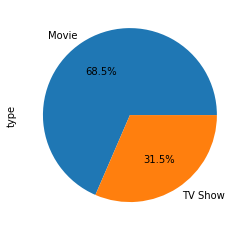

In [42]:
data.type.value_counts().plot(kind='pie',autopct='%1.1f%%')

 In terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

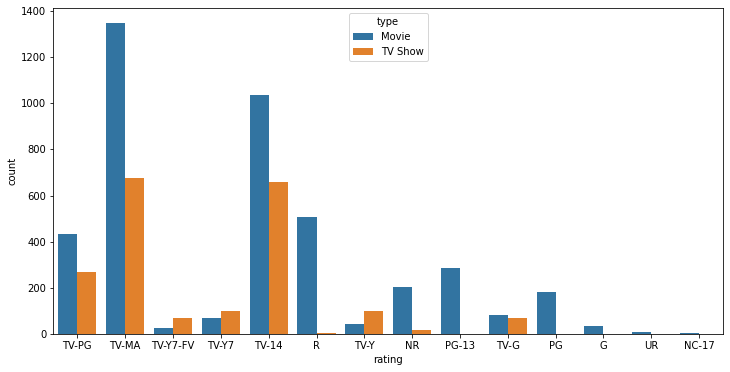

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(data.rating,hue=data.type)

Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. 

## Content added each year


In [63]:
netflix_year = data['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year.head()

,year,release_year
0,2018,1062
1,2017,957
2,2019,843
3,2016,828
4,2015,510


In [77]:
netflix_movie_year = netflix_Movies['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_movie_year = netflix_movie_year[netflix_movie_year.year != 2020]
netflix_movie_year.head()

,year,release_year
0,2017,680
1,2018,646
2,2016,592
3,2019,400
4,2015,359


In [78]:
netflix_TV_year = netflix_TV['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_TV_year = netflix_TV_year[netflix_TV_year.year != 2020]
netflix_TV_year.head()

,year,release_year
0,2019,443
1,2018,416
2,2017,277
3,2016,236
4,2015,151


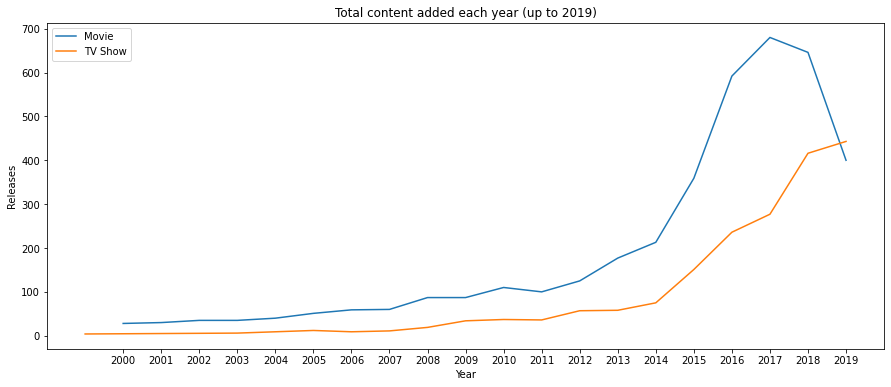

In [98]:
import numpy as np
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data=netflix_movie_year[:20], x='year', y='release_year')
sns.lineplot(data=netflix_TV_year[:18], x='year', y='release_year')
ax.set_xticks(np.arange(2000, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

## Countries with the most content available


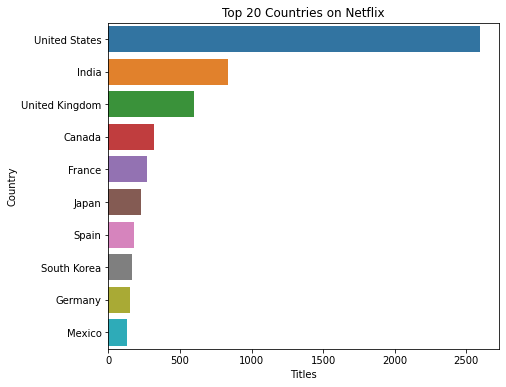

In [102]:
filtered_countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,6))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

## Popular Genres


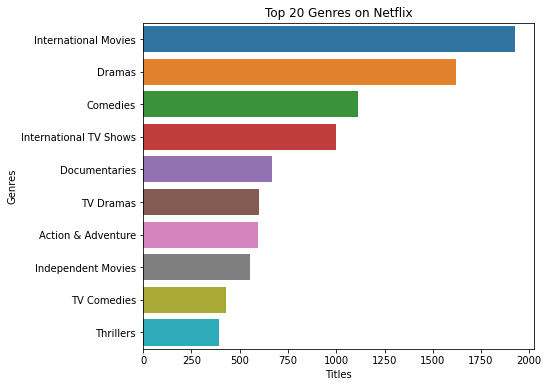

In [105]:
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()